In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
customers=pd.read_csv("/content/Mall_Customers.csv")

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers.shape

(200, 5)

In [5]:
customers.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
customers.duplicated().sum()

0

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Exploring the data

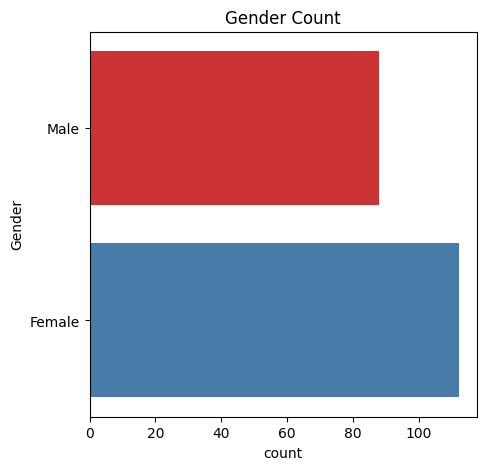

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(y = 'Gender', data = customers, palette = 'Set1')
plt.title('Gender Count');

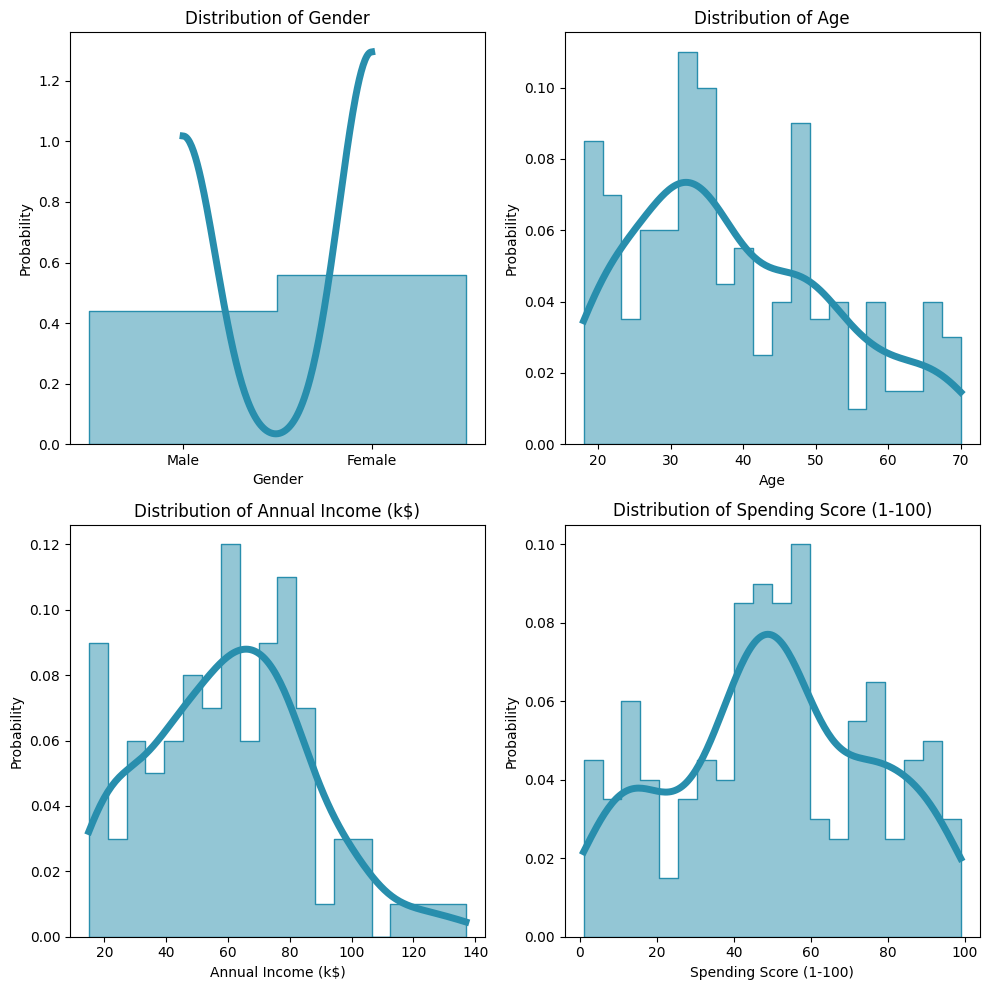

In [19]:
plt.figure(figsize=(10,10))
for i, j in enumerate(customers.columns[1:]):
    ax = plt.subplot(2,2, i+1)
    sns.histplot(x = j, data = customers, bins = 20, kde = True, stat = 'probability',
                 fill = True, color = '#288ead', element = 'step',
                 line_kws = {'lw': 5})
    plt.title('Distribution of {}'.format(j))
plt.tight_layout()

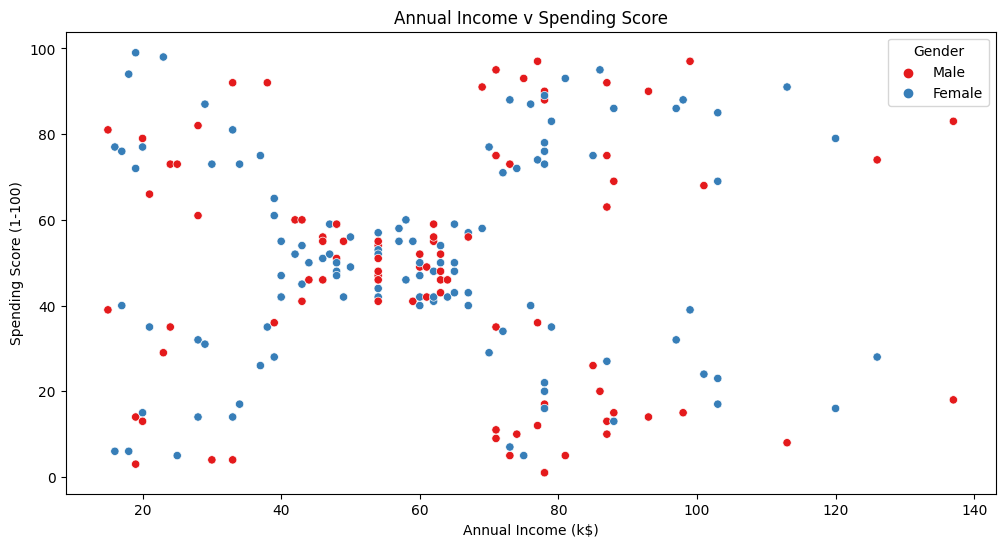

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = customers,
                hue = 'Gender', palette = 'Set1');
plt.title('Annual Income v Spending Score');

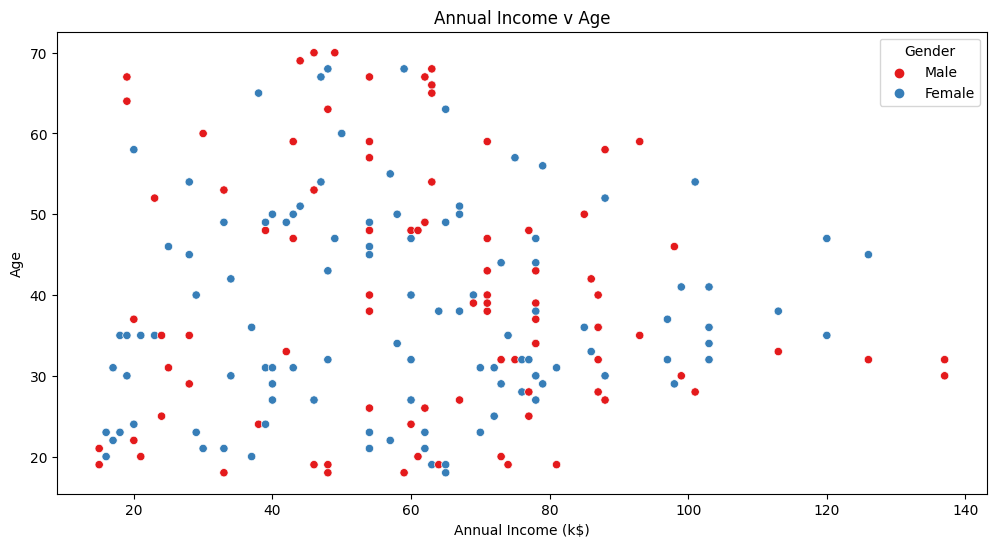

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Age', data = customers,
                hue = 'Gender', palette = 'Set1');
plt.title('Annual Income v Age');

In [23]:
#Defining a function to plot the clusters

In [24]:
def plot_clusters(x, h, model, labels, centroids):
    #Creating a meshgrid for visualization
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    #Plotting the clusters using the meshgrid
    sns.set_style('ticks')
    plt.clf()
    plt.figure(figsize=(12, 6))

    plt.imshow(z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = 'Pastel1', aspect = 'auto',
           origin = 'lower')

    sns.scatterplot(x = x[:, 0], y = x[:, 1],
                hue = labels, palette = 'tab10', s = 100)
    plt.scatter(x = centroids[:, 0] , y = centroids[:, 1],
                s = 100, c = 'black', alpha = 0.8, marker = 'X')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [25]:
#Clustering for Age and Spending Score

In [31]:
from yellowbrick.cluster import KElbowVisualizer

def elbow_plot(x):
    sns.set_style('ticks')
    plt.figure(figsize=(10,6))

    visualizer = KElbowVisualizer(KMeans(**kmeans_kwargs), k=(2,10))
    visualizer.fit(x)
    visualizer.show();

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X =customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X1 = customers[['Age', 'Spending Score (1-100)']].values
X2 = customers[['Age', 'Annual Income (k$)']].values
X3 = customers[['Spending Score (1-100)', 'Annual Income (k$)']].values

#Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)

In [28]:
#Creating a dictionary containing kmeans model arguments
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 20,
    'max_iter': 300,
    'random_state': 40
}

In [29]:
def kmeans_model(k, x):
    model = KMeans(k, **kmeans_kwargs)
    model.fit(x)
    labels = model.labels_
    centroids = model.cluster_centers_
    return model, labels, centroids

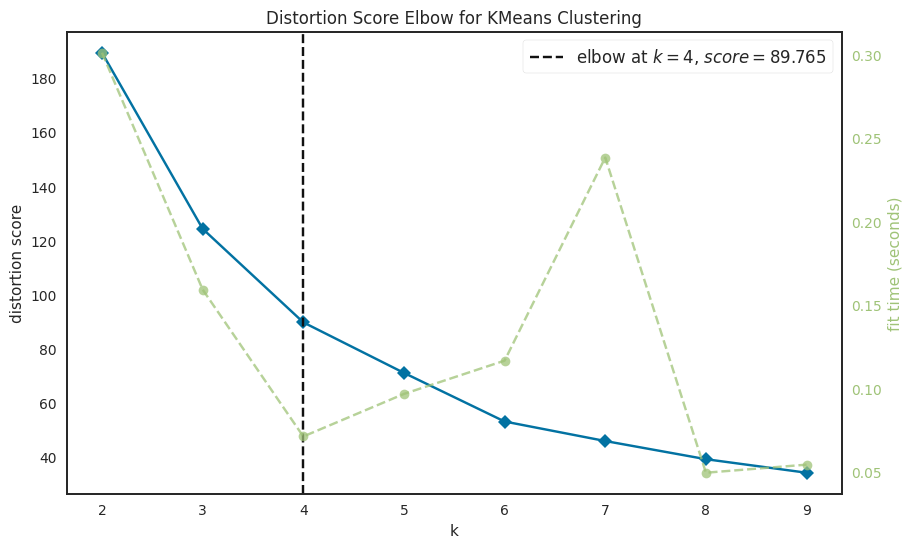

In [32]:
elbow_plot(X1)

In [36]:
X1_model, X1_labels, X1_centroids = kmeans_model(4, X1)

<Figure size 800x550 with 0 Axes>

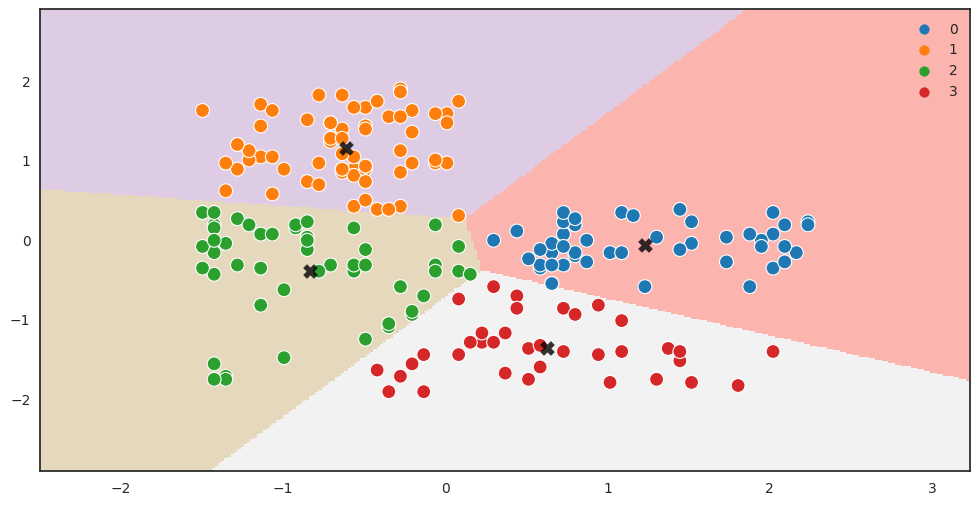

In [34]:
plot_clusters(X1, 0.02, X1_model, X1_labels, X1_centroids)

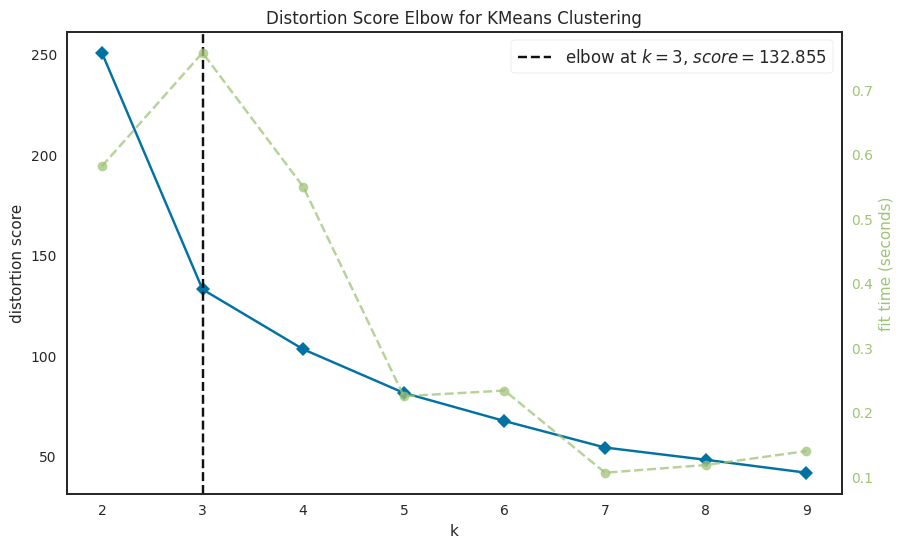

In [35]:
elbow_plot(X2)

In [37]:
X1_model, X1_labels, X1_centroids = kmeans_model(3, X2)

<Figure size 800x550 with 0 Axes>

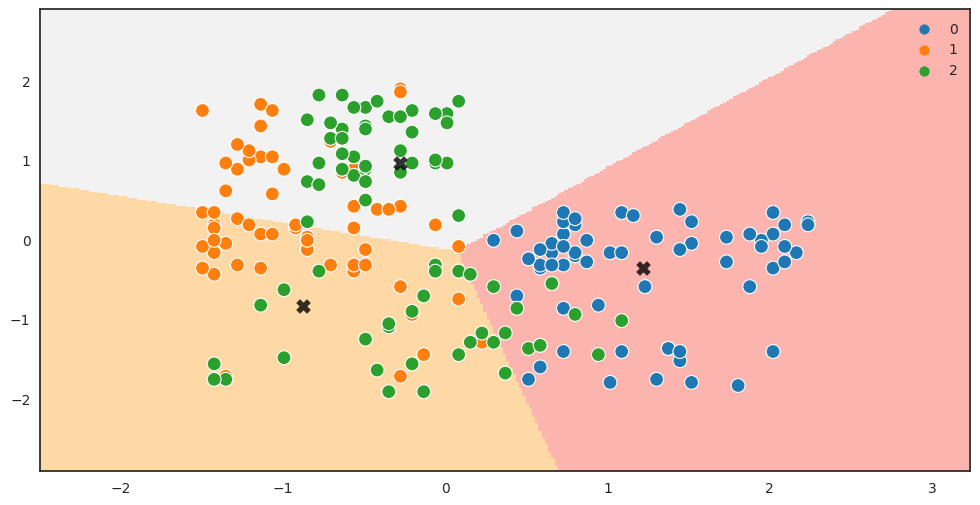

In [38]:
plot_clusters(X1, 0.02, X1_model, X1_labels, X1_centroids)

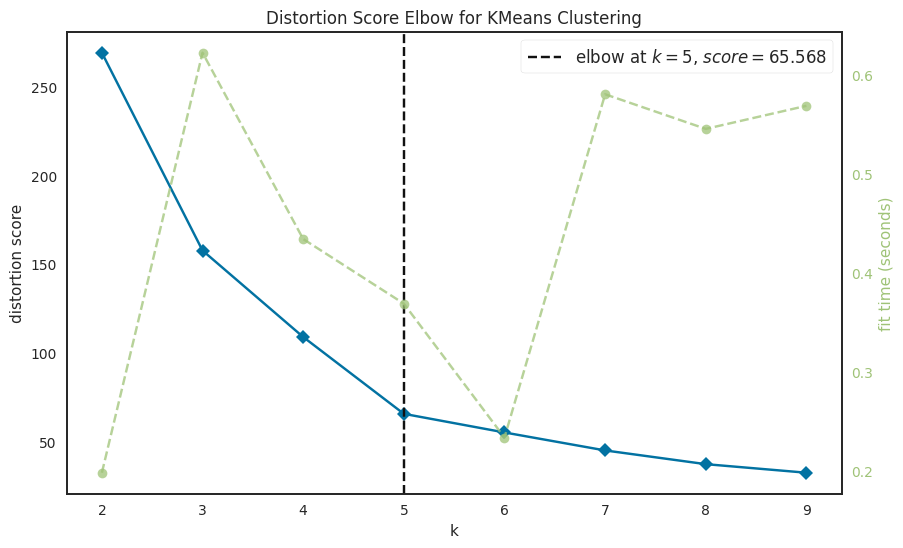

In [39]:
elbow_plot(X3)

In [40]:
X1_model, X1_labels, X1_centroids = kmeans_model(5, X3)

<Figure size 800x550 with 0 Axes>

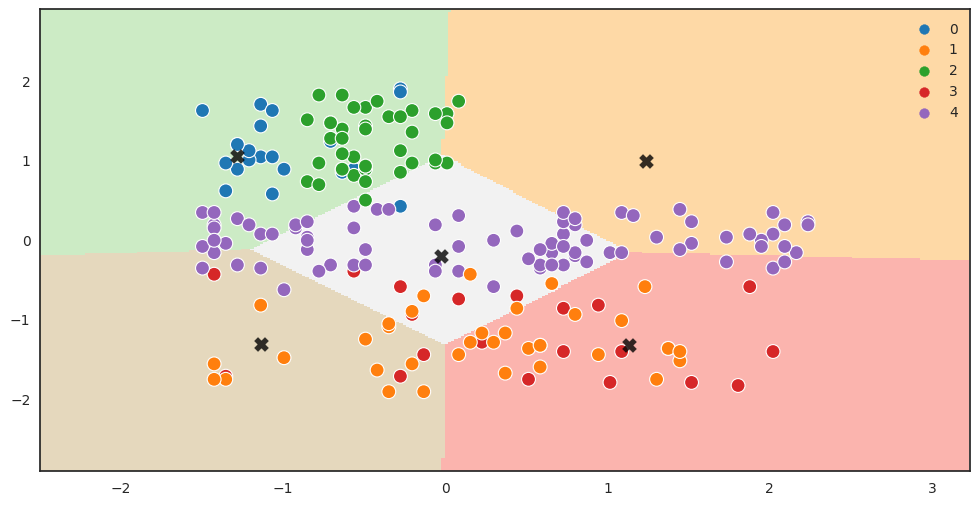

In [41]:
plot_clusters(X1, 0.02, X1_model, X1_labels, X1_centroids)

In [42]:
# We can see with 4 cluster there is clear sepration among the datapoints